In [1]:
import pandas as pd

C:\ProgramData\Miniconda3\envs\prophet\lib\site-packages\ipykernel\parentpoller.py:109: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


In [5]:
from fbprophet import Prophet

C:\ProgramData\Miniconda3\envs\prophet\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [23]:
features = pd.read_csv("./data/features.csv")
stores = pd.read_csv("./data/stores.csv")
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [24]:
feat_sto = features.merge(stores, how='inner', on='Store')

In [25]:
train_detail = train.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [26]:
test_detail = test.merge(feat_sto, 
                           how='inner',
                           on=['Store','Date','IsHoliday']).sort_values(by=['Store',
                                                                            'Dept',
                                                                            'Date']).reset_index(drop=True)

In [27]:
del features, train, stores, test

In [28]:
train_detail = train_detail.fillna(0)
train_detail.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [29]:
test_detail = test_detail.fillna(0)
test_detail.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [30]:
train_detail = train_detail.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_detail = test_detail.drop(columns=['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [31]:
train_detail.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,211.350143,8.106,A,151315


In [32]:
test_detail.head()

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,223.610984,6.573,A,151315


In [33]:
train_detail = train_detail.drop(columns=['Store','Dept','IsHoliday','Temperature','CPI','Unemployment'])
test_detail = test_detail.drop(columns=['Store','Dept','IsHoliday','Temperature','CPI','Unemployment'])

In [34]:
train_detail.head()

,Date,Weekly_Sales,Type,Size
0,2010-02-05,24924.50,A,151315
1,2010-02-12,46039.49,A,151315
2,2010-02-19,41595.55,A,151315
3,2010-02-26,19403.54,A,151315
4,2010-03-05,21827.90,A,151315


In [36]:
test_detail.head()

,Date,Type,Size
0,2012-11-02,A,151315
1,2012-11-09,A,151315
2,2012-11-16,A,151315
3,2012-11-23,A,151315
4,2012-11-30,A,151315


In [37]:
train_detail = train_detail.drop(columns=['Type','Size'])
test_detail = test_detail.drop(columns=['Type','Size'])

In [38]:
train_detail.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [51]:
train_detail.tail()

,ds,y
25,2010-07-30,15381.82
26,2010-08-06,17508.41
27,2010-08-13,15536.40
28,2010-08-20,15740.13
29,2010-08-27,15793.87


In [52]:
train_detail = train_detail.iloc[0:30]

In [53]:
train_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      30 non-null     object 
 1   y       30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [54]:
model = Prophet()

In [55]:
train_detail.columns = ['ds', 'y']

In [56]:
train_detail.head()

,ds,y
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [57]:
model.fit(train_detail)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [58]:
future = model.make_future_dataframe(periods=30, freq='D')

In [59]:
future.tail()

,ds
55,2010-09-22
56,2010-09-23
57,2010-09-24
58,2010-09-25
59,2010-09-26


In [61]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,31679.828445,20626.535419,42066.845526,31679.828445,31679.828445,0.0,0.0,0.0,0.0,0.0,0.0,31679.828445
1,2010-02-12,30998.099647,20247.230209,41090.643250,30998.099647,30998.099647,0.0,0.0,0.0,0.0,0.0,0.0,30998.099647
2,2010-02-19,30316.370849,18299.056410,41416.843312,30316.370849,30316.370849,0.0,0.0,0.0,0.0,0.0,0.0,30316.370849
3,2010-02-26,29634.642050,19304.224650,40668.150431,29634.642050,29634.642050,0.0,0.0,0.0,0.0,0.0,0.0,29634.642050
4,2010-03-05,28952.913252,17806.870264,40264.285410,28952.913252,28952.913252,0.0,0.0,0.0,0.0,0.0,0.0,28952.913252


In [62]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

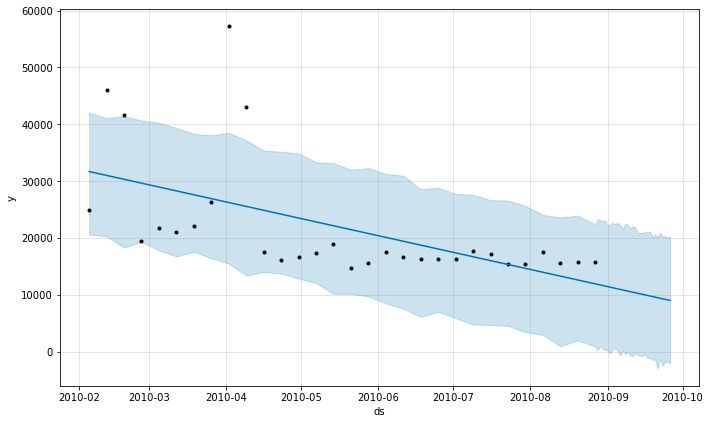

In [64]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
model.plot(forecast);

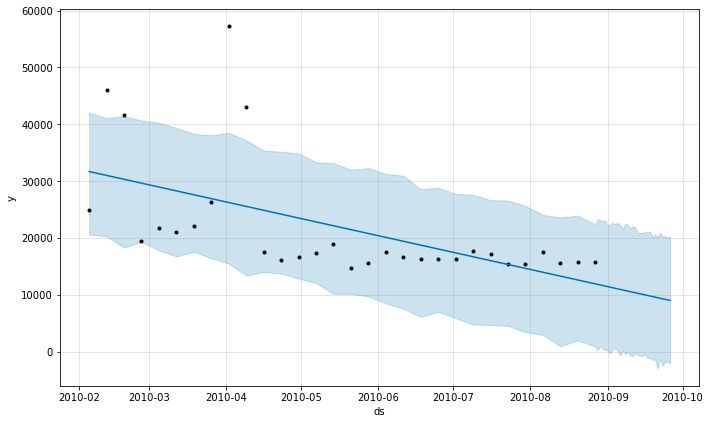

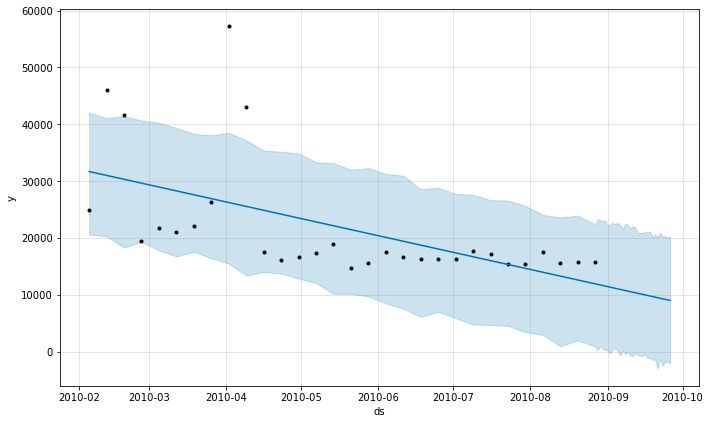

In [65]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']]
model.plot(forecast)